# Learning Outcomes
1. Load, save and show images
2. Load, show and save videos
3. Image resizing

## Why OpenCV?
- Compatible with multiple major OS, like Windows, Linux and even MacOS.
- Written in different languages like Python, C++ and Java (commonly applied in Android apps).
- Interoperable with NUMPY module, thereby enabling fast computation of image arrays.
- There are a lot of useful resources online (articles, StackOverflow posts, large community support, etc.)

## Types of image files (formats)
- JPEG (.jpg [Windows], .jpeg [MacOS], .jfif [Google Search])
* Used in photos stored in cameras/mobiles phones
- PNG (.png)
* Lossless compression. Used in webpage and file transfers.
- WEBP (.webp)
* Introduced in 2015 by Google. Smaller file size compared to JPG and PNG
- TIFF (.tif)
* Used for printing (high quality), large file size
- bitmap (.bmp)
* Multipurpose but large file size
- GIF (.gif)
* Animation (OpenCV can't handle GIF files)


# Setup

In [1]:
import sys
# at least Puthon 3.7 required
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [2]:
print(cv.__version__)

4.8.0


# Load and show Images


In [3]:
img = cv.imread("images/lena.jfif")
grayscale = cv.imread("images/lena.jfif", 0) # Second arg -> FLAG, 1(default), 0(GRAYSCALE), -1(cv.imread_UNCHANGED)

cv.imshow("lena_color",img)
cv.imshow("grayscale", grayscale)
cv.waitKey(0) # Wait for user response -> 0: Wait indefinitely
cv.destroyAllWindows()

In [4]:
def show_img(window_name, img):
    "2 arguments: window name and image"
    cv.imshow(window_name, img)
    cv.waitKey(0) # Wait for user response -> 0: Wait indefinitely
    cv.destroyAllWindows()

In [5]:
img = cv.imread("images/lena.png")
show_img("png image", img)

In [6]:
# show the difference between png and jpeg
img_png = cv.imread("images/lena.png")
img_jpeg = cv.imread("images/lena.jpg")

#print(f"The shape of png image: {img_png.shape}")
#print(f"The shape of jpg image: {img_jpeg.shape}")

In [7]:
!pip install imageio

In [8]:
import imageio

In [9]:
GIF = imageio.mimread("images/rotating_earth_large.gif")
# convert RGB to BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(200) # wait for 0.2 second user input

cv.destroyAllWindows()

## Save images
```
cv.imwrite(filepath, img)
```

In [10]:
# formalized way to load, show and save images
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys/exit("No such file!")

cv.imshow("lena", img)
k = cv.waitKey(0) & 0xFF
if k == 115: # Press 's' key => 's' = 115 ASCII
    cv.imwrite("lena_save.jpg", jpg)

cv.destroyAllWindows()

In [11]:
print(img)

[[[120 133 231]
  [120 133 231]
  [119 132 230]
  ...
  [107 124 217]
  [128 143 236]
  [115 114 217]]

 [[119 132 230]
  [119 132 230]
  [119 132 230]
  ...
  [130 143 235]
  [151 159 252]
  [123 120 219]]

 [[119 132 230]
  [118 131 229]
  [118 131 229]
  ...
  [111 115 204]
  [113 111 201]
  [ 74  61 153]]

 ...

 [[ 74  34  92]
  [ 65  27  87]
  [ 59  22  84]
  ...
  [ 74  51 126]
  [ 79  58 137]
  [ 79  62 149]]

 [[ 74  34  92]
  [ 64  26  86]
  [ 57  20  82]
  ...
  [ 79  57 135]
  [ 86  69 150]
  [ 81  66 157]]

 [[ 56  18  76]
  [ 74  38  98]
  [ 61  25  91]
  ...
  [ 89  70 151]
  [ 92  75 162]
  [ 90  76 172]]]


## Video Operations
Load and show videos


In [12]:
# Create a VideoCapture object
cap = cv.VideoCapture('videos/img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
# Read the frames with loop
while cap.isOpened():
    # first output is boolean
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow('frame', frame)

    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
cv.destroyAllWindows()

## Webcam
show webcam recording and save


In [13]:
cap = cv.VideoCapture(0)
# object

if not cap.isOpened():
    sys.exit("No webcam detected!")
    
# Object that can handle save videos
# Arguments: filepath, fourcc, fps, width & height

fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))

out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w, h))

while True:
    # first output is boolean
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
    out.write(frame)
    cv.imshow("frame", frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

In [17]:
print(f"The fps if we play the video using software: {cap.get(5)}")
n_frames = cap.get(7)
# print(f"The fps if we play the video using OpenCV imshow: {n_frames / (end - start)})")

The fps if we play the video using software: 30.0


## Image resizing
1. Set arbitrary sizes (w, h) 
2. Scale factor

In [19]:
# 1st Method:
img = cv.imread("images/soccer.jpg")

# arguments: source image, tuple of new width and height, fx and fy, interpolation methods
new_width = 300
new_height = 450
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("img", img)
show_img("resize", img_resize)


In [20]:
img.shape

(1200, 800, 3)

In [21]:
# 2nd Method:
img = cv.imread("images/lena.jfif")
factor = 1.3
img_resize = cv.resize(img, None, fx=factor, fy=factor)


cv.imshow("image", img)
show_img(f"resize with factor: {factor}", img_resize)

# Question 2


In [30]:
img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("original", img)
show_img("grayscale", grayscale)


In [31]:
## 2nd way: use matplotlib module, for those have problem using cv
import matplotlib.pyplot as plt


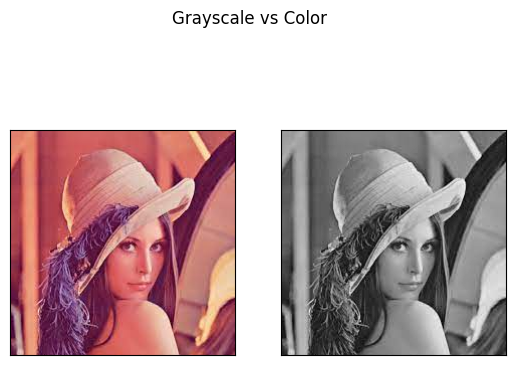

In [32]:
# change BGR2RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap = plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("Grayscale vs Color")
plt.show()

In [34]:
# 3rd Method:
gray = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)
img_combined = np.hstack((img, gray))
# img_combined = np.vstack((img, gray))
show_img("color grayscale", img_combined)

# Revision from Week 2 Exercise

In [35]:
# create img
black = np.zeros((200, 200), dtype=np.uint8)

show_img("black", black)

In [36]:
h, w = black.shape[:2]
Xc = int(w / 2)
Yc = int(h / 2)

criteria = np.fromfunction(lambda i, j: np.sqrt((Xc - i)**2 + (Yc - j)**2), (200, 200))

In [37]:
black[criteria <= 25] = 255

show_img("black", black)

In [38]:
black[75:125, 75:125] = 255

show_img("black", black)